# Nordstrom-Ford Regression (in R)

In [16]:
library(MASS)
library(Quandl)
library(ggplot2)
library(stringr)
library(R.cache)
library(quantmod)

In [17]:
##add memoization to quandl-fetching function
reload.data = TRUE
QLoad <- R.cache::addMemoization(Quandl::Quandl)

In [18]:
##load data on Nordstrom and Ford stock prices
if (reload.data) {
    cat("Data Reload/n")
    jwn.raw <- QLoad(c('WIKI/JWN'))
    f.raw <- QLoad(c('WIKI/F'))
    }

Data Reload/n

In [19]:
##merge
jwn <- jwn.raw
f <- f.raw
names(jwn) <- paste("WIKI.JWN -",names(jwn))
names(f) <- paste("WIKI.F -",names(f))
names(jwn)[1] <-"Date"
names(f)[1] <-"Date"
raw_data = merge(jwn, f)
names(raw_data)

[1] "Date"                   "WIKI.JWN - Open"        "WIKI.JWN - High"       
 [4] "WIKI.JWN - Low"         "WIKI.JWN - Close"       "WIKI.JWN - Volume"     
 [7] "WIKI.JWN - Ex-Dividend" "WIKI.JWN - Split Ratio" "WIKI.JWN - Adj. Open"  
[10] "WIKI.JWN - Adj. High"   "WIKI.JWN - Adj. Low"    "WIKI.JWN - Adj. Close" 
[13] "WIKI.JWN - Adj. Volume" "WIKI.F - Open"          "WIKI.F - High"         
[16] "WIKI.F - Low"           "WIKI.F - Close"         "WIKI.F - Volume"       
[19] "WIKI.F - Ex-Dividend"   "WIKI.F - Split Ratio"   "WIKI.F - Adj. Open"    
[22] "WIKI.F - Adj. High"     "WIKI.F - Adj. Low"      "WIKI.F - Adj. Close"   
[25] "WIKI.F - Adj. Volume"

In [20]:
##define function that cleans up column names
clean.quandl.name <- function(x) {
    cleaned <- x
    if (x=='Date') {
        
    } else {
        tryCatch({
                    parts <- stringr::str_split(x, " - ",n=2)
                    first.parts <- stringr::str_split(parts[[1]][[1]], "\\.",n=2)
                    cleaned <- paste(first.parts[[1]][[2]], parts[[1]][[2]], sep=".")
                    cleaned <- str_replace_all(cleaned," ","")
                    },
                 error = function(e) {cat(paste0("Err on",x,"\n"))}
                 )
    }
    stringr::str_trim(cleaned)
}

In [21]:
##rename data
fixed.names <- lapply(names(raw_data),clean.quandl.name)
cat(paste(fixed.names,sep="\n"))
renamed_data <- raw_data
names(renamed_data) <- fixed.names

Date JWN.Open JWN.High JWN.Low JWN.Close JWN.Volume JWN.Ex-Dividend JWN.SplitRatio JWN.Adj.Open JWN.Adj.High JWN.Adj.Low JWN.Adj.Close JWN.Adj.Volume F.Open F.High F.Low F.Close F.Volume F.Ex-Dividend F.SplitRatio F.Adj.Open F.Adj.High F.Adj.Low F.Adj.Close F.Adj.Volume

In [22]:
renamed_data=with(renamed_data, renamed_data[(Date >= "2017-06-19" & Date <= "2017-07-14"), ])

In [23]:
#daily stock price regression
modl <- lm(JWN.Close~F.Close, data=renamed_data)
summary(modl)


Call:
lm(formula = JWN.Close ~ F.Close, data = renamed_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2992 -0.5276  0.2103  0.4687  1.1490 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  49.8900    10.1669   4.907 0.000133 ***
F.Close      -0.2274     0.9023  -0.252 0.804034    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7379 on 17 degrees of freedom
Multiple R-squared:  0.003723,	Adjusted R-squared:  -0.05488 
F-statistic: 0.06352 on 1 and 17 DF,  p-value: 0.804


In [24]:
gpl <- ggplot(renamed_data,aes(x=F.Adj.Close,y=JWN.Adj.Close))+geom_point()+geom_smooth(method=lm)+ggtitle("F and JWN Daily Adjusted Close Prices, birthday month") 

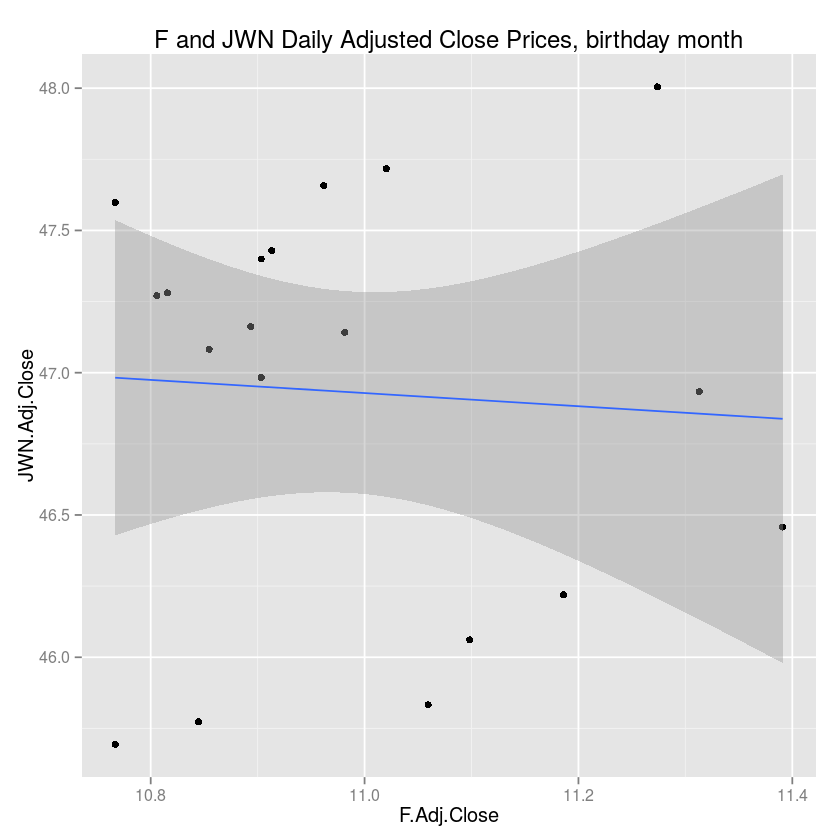

In [25]:
print(gpl)

In [26]:
ret<-data.frame(JWN.Return=(renamed_data$JWN.Adj.Close[2:19]-renamed_data$JWN.Adj.Close[1:18])/renamed_data$JWN.Adj.Close[1:18],F.Return=(renamed_data$F.Adj.Close[2:19]-renamed_data$F.Adj.Close[1:18])/renamed_data$F.Adj.Close[1:18])

In [27]:
mod2 <- lm(JWN.Return~F.Return, data=ret)
summary(mod2)


Call:
lm(formula = JWN.Return ~ F.Return, data = ret)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.031800 -0.006685  0.002180  0.006790  0.028709 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.002400   0.003585  -0.669    0.513
F.Return     0.499605   0.294982   1.694    0.110

Residual standard error: 0.01496 on 16 degrees of freedom
Multiple R-squared:  0.152,	Adjusted R-squared:  0.09903 
F-statistic: 2.869 on 1 and 16 DF,  p-value: 0.1097


In [28]:
gp2 <- ggplot(ret, aes(y=JWN.Return, x=F.Return))+geom_point()+geom_smooth(method=lm)+ggtitle("F and JWN Daily Return, birthday month")

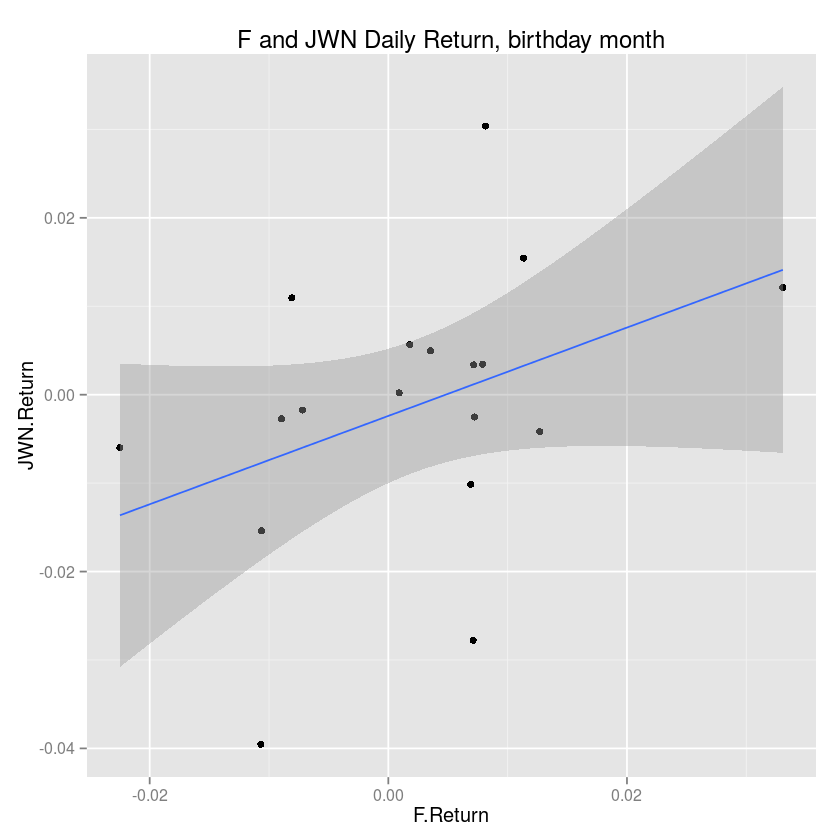

In [29]:
print(gp2)